# Project 3: Temperatures Dashboard

In this project, we will analyze a dataset with temperatures from 10 cities around the world extracting some interesting insights and developing two charts about them. We will be using once more Pandas and Matplotlib, but this time we will convert a column into timestamp date type, so we will be able to do some time sereis analysis and plots.

Data extracted from: https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities (with some cleaning and modifications).


### Project Tasks:

- `3.1.` Load the dataset from the defined data_path and display the first 5 rows.

- `3.2.` Create a new column called `AvgTemperatureCelsius` that contains the temperature in Celsius degrees.

- `3.3.` How many different countries are there? Provide a list of them.

- `3.4.` What is the minimum and maximum timestamps?

- `3.5.` What is the global minimum and maximum temperature? Find the city and the date of each of them.

- `3.6.` For a given city and a range of dates (start and end):
  - Make a line plot with the temperature reads of that city during the selected time period, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of that city during the selected time period.
  - Make sure that all plots include a title, axis labels and a legend.

- `3.7.` Now repeat the previous question but for a list of cities instead of a single one:
  - Make a line plot with the temperature reads of the cities in the list, for the selected time period, every city has to be a different line with a different color, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of a list of selected cities, for the selected time period, every city has to be its own distribution with a different color.
  - Make sure that all plots include a title, axis labels and a legend.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Ex 3.1: Load the dataset from the defined data_path and display the first 5 rows.

data_path = "../data/cities_temperatures.csv"

temps_df = pd.read_csv(data_path)  # TODO

temps_df

,Country,City,AvgTemperatureFahrenheit,Date,Month,Year
0,Argentina,Buenos Aires,79.5,2000-01-01,1,2000
1,Argentina,Buenos Aires,78.8,2000-01-02,1,2000
2,Argentina,Buenos Aires,74.3,2000-01-03,1,2000
3,Argentina,Buenos Aires,79.0,2000-01-04,1,2000
4,Argentina,Buenos Aires,77.1,2000-01-05,1,2000
...,...,...,...,...,...,...
72727,US,Washington,45.7,2019-12-27,12,2019
72728,US,Washington,49.6,2019-12-28,12,2019
72729,US,Washington,48.9,2019-12-29,12,2019
72730,US,Washington,55.0,2019-12-30,12,2019


In [5]:
#Print the first 5 rows.
print(temps_df.head(5))

     Country          City  AvgTemperatureFahrenheit        Date  Month  Year
0  Argentina  Buenos Aires                      79.5  2000-01-01      1  2000
1  Argentina  Buenos Aires                      78.8  2000-01-02      1  2000
2  Argentina  Buenos Aires                      74.3  2000-01-03      1  2000
3  Argentina  Buenos Aires                      79.0  2000-01-04      1  2000
4  Argentina  Buenos Aires                      77.1  2000-01-05      1  2000


In [6]:
# Converting the date column to datetime date format in order to be able to analyze better the time series and plot it
temps_df["Date"] = pd.to_datetime(temps_df["Date"]).dt.date

In [7]:
# Ex 3.2: Create a new column called `AvgTemperatureCelsius` that contains the temperature in Celsius degrees.

# temps_df["AvgTemperatureCelsius"] = ...  # TODO: uncomment this line to complete it

temps_df["AvgTemperature_Celsius"] = (temps_df["AvgTemperatureFahrenheit"] - 32) * 5/9
temps_df["AvgTemperature_Celsius"] = temps_df["AvgTemperature_Celsius"].round(2)

temps_df

,Country,City,AvgTemperatureFahrenheit,Date,Month,Year,AvgTemperature_Celsius
0,Argentina,Buenos Aires,79.5,2000-01-01,1,2000,26.39
1,Argentina,Buenos Aires,78.8,2000-01-02,1,2000,26.00
2,Argentina,Buenos Aires,74.3,2000-01-03,1,2000,23.50
3,Argentina,Buenos Aires,79.0,2000-01-04,1,2000,26.11
4,Argentina,Buenos Aires,77.1,2000-01-05,1,2000,25.06
...,...,...,...,...,...,...,...
72727,US,Washington,45.7,2019-12-27,12,2019,7.61
72728,US,Washington,49.6,2019-12-28,12,2019,9.78
72729,US,Washington,48.9,2019-12-29,12,2019,9.39
72730,US,Washington,55.0,2019-12-30,12,2019,12.78


In [8]:
# Ex 3.3: How many different cities are there? Provide a list of them.

unique_cities_list = temps_df["City"].unique() # TODO: this should be a list of unique countries

num_unique_cities = len(unique_cities_list) 

print("The unique cities are", unique_cities_list)
print(f"There are {num_unique_cities} cities")

# TODO: print a message with the number of unique countries and the list of them

The unique cities are ['Buenos Aires' 'Canberra' 'Bogota' 'Cairo' 'Munich' 'Calcutta' 'Tokyo'
 'Dakar' 'Capetown' 'Washington']
There are 10 cities


In [9]:
# Ex 3.4: What are the minimum and maximum dates?

min_date = temps_df["Date"].min()  # TODO
max_date = temps_df["Date"].max()  # TODO

# TODO: print a message with the min and max dates

print(f"Min date: {min_date}, Max date: {max_date}")

Min date: 2000-01-01, Max date: 2019-12-31


In [10]:
# Ex 3.5: What are the global minimum and maximum temperatures? Find the city and the date of each of them.

min_temp_loc = temps_df["AvgTemperature_Celsius"].idxmin()
max_temp_loc = temps_df["AvgTemperature_Celsius"].idxmax()

min_temp = temps_df["AvgTemperature_Celsius"].min()   # TODO
max_temp = temps_df["AvgTemperature_Celsius"].max()   # TODO


min_temp_city = temps_df.loc[min_temp_loc, "City"] # TODO
min_temp_date = temps_df.loc[min_temp_loc, "Date"]  # TODO

max_temp_city = temps_df.loc[max_temp_loc, "City"]  # TODO
max_temp_date = temps_df.loc[max_temp_loc, "Date"]  # TODO

# TODO: print a message with the min temperature, its city and date, and then another message with the max temperature, its city and date.

print(f"The minimun temperature in {min_temp_city} on {min_temp_date} is:", min_temp)
print(f"The maximun temperature in {max_temp_city} on {max_temp_date} is:", max_temp)

The minimun temperature in Munich on 2000-01-25 is: -16.78
The maximun temperature in Cairo on 2019-05-23 is: 37.89


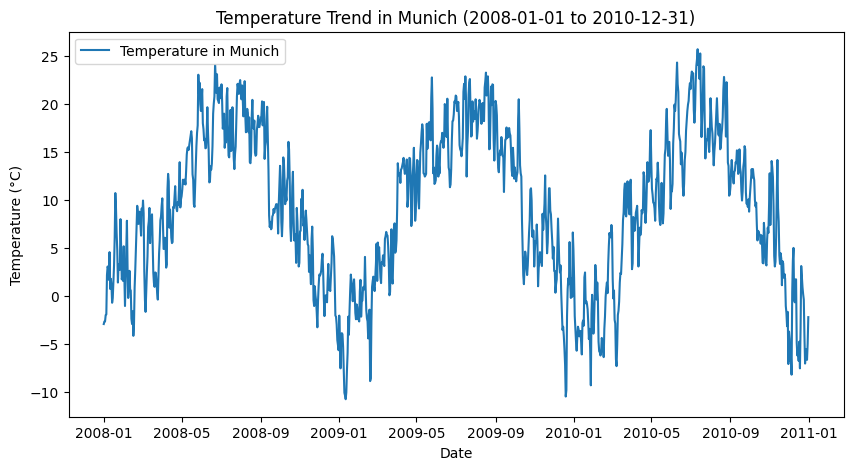

In [11]:
# Ex 3.6: For a given city and a range of dates (start and end):
#   - Make a line plot with the temperature reads of that city during the selected time period, the x axis has to be the timestamp column.
#   - Make a histogram of the temperature reads of that city during the selected time period.
#   - Make sure that all plots include a title, axis labels and a legend.

import pandas as pd

city = "Munich"
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()

city_df = temps_df[temps_df["City"] == city]          # TODO: get a dataframe with the rows of the selected city

city_df_period = temps_df[(temps_df["City"] == city) & (temps_df["Date"] >= start_date) & (temps_df["Date"] <= end_date)]  # TODO: get a dataframe with the rows of the selected city and the selected period of time using the Date column and any of the <, >, <=, >= operators to compare with start_date and end_date

plt.figure(figsize=(10, 5))

# TODO: Uncomment and complete the following lines to plot the line plot using the city_df_period AvgTemperatureCelsius column as the y axis and the Date column as the x axis

plt.plot(city_df_period["Date"], city_df_period["AvgTemperature_Celsius"], label = (f"Temperature in {city}"))   # TODO
plt.title(f"Temperature Trend in {city} ({start_date} to {end_date})")   # TODO
plt.xlabel("Date")  # TODO
plt.ylabel("Temperature (°C)")  # TODO
plt.legend()

plt.show()


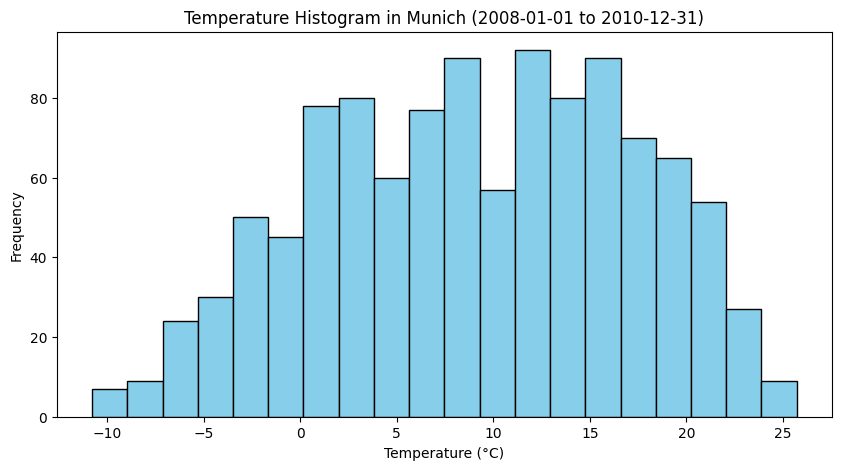

In [12]:
# TODO: Build the histogram plot using the city_df_period AvgTemperatureCelsius column as the data to plot

plt.figure(figsize=(10, 5))

plt.hist(city_df_period["AvgTemperature_Celsius"], bins=20, color='skyblue', edgecolor='black')    # TODO: use the city_df_period AvgTemperatureCelsius column as the data to plot, you can use the parameter bins=20
plt.title(f"Temperature Histogram in {city} ({start_date} to {end_date})")  # TODO
plt.xlabel("Temperature (°C)")  # TODO
plt.ylabel("Frequency")  # TODO

plt.show()

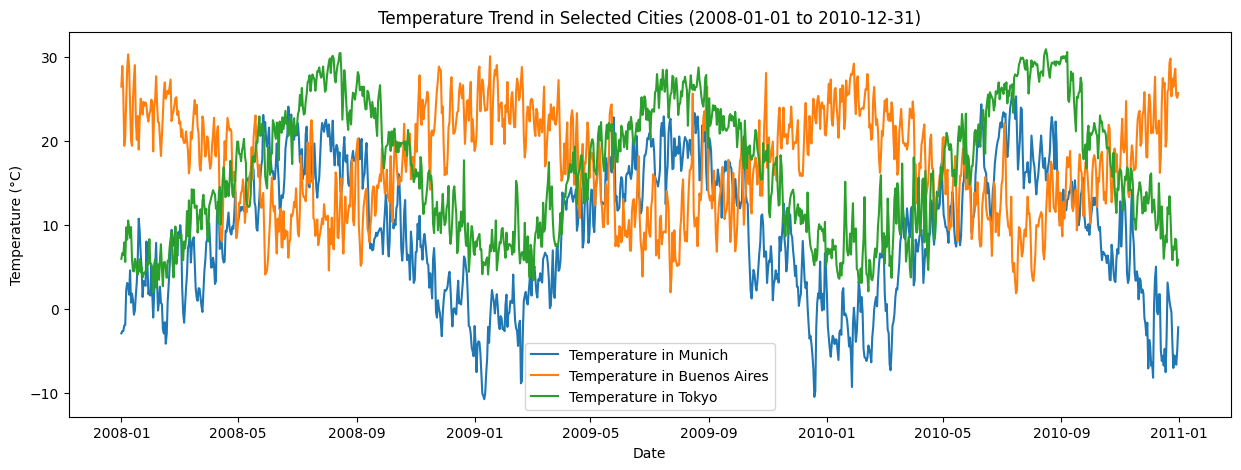

In [16]:
# Ex 3.7: Now repeat the previous question but for a list of cities:
#   - Make a line plot with the temperature reads of the cities in the list, for the selected time period, every city has to be a different line with a different color, the x axis has to be the timestamp column.
#   - Make a histogram of the temperature reads of a list of selected cities, for the selected time period, every city has to be its own distribution with a different color.
#   - Make sure that all plots include a title, axis labels and a legend.

selected_cities = ["Munich", "Buenos Aires", "Tokyo"]
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()


plt.figure(figsize=(15, 5))

# TODO: Uncomment and complete the following lines to plot the line plot using the city_df_period AvgTemperatureCelsius column as the y axis and the Date column as the x axis

for city in selected_cities:
     city_df = temps_df[temps_df["City"] == city]            # TODO: get a dataframe with the rows of the selected city
     city_df_period = temps_df[(temps_df["City"] == city) & (temps_df["Date"] >= start_date) & (temps_df["Date"] <= end_date)]     # TODO: get a dataframe with the rows of the selected city and the selected period of time using the Date column and any of the <, >, <=, >= operators to compare with start_date and end_date
     plt.plot(city_df_period["Date"], city_df_period["AvgTemperature_Celsius"], label=f"Temperature in {city}")                # TODO plot each city line and use the label parameter to set the legend name for each city

plt.title(f"Temperature Trend in Selected Cities ({start_date} to {end_date})")   # TODO
plt.xlabel("Date")  # TODO
plt.ylabel("Temperature (°C)")  # TODO

plt.legend()

plt.show()

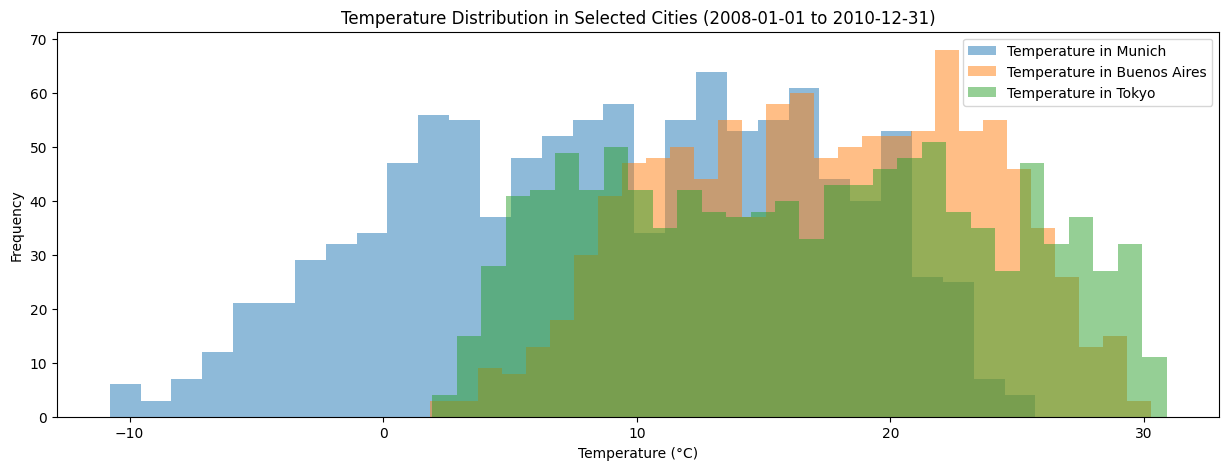

In [17]:
# TODO: Build the histogram plot for the selected cities using the city_df_period AvgTemperatureCelsius column as the data to plot for each one

plt.figure(figsize=(15, 5))

for city in selected_cities:
     city_df = temps_df[temps_df["City"] == city]             # TODO: get a dataframe with the rows of the selected city
     city_df_period = temps_df[(temps_df["City"] == city) & (temps_df["Date"] >= start_date) & (temps_df["Date"] <= end_date)]     # TODO: get a dataframe with the rows of the selected city and the selected period of time using the Date column and any of the <, >, <=, >= operators to compare with start_date and end_date
     plt.hist(city_df_period["AvgTemperature_Celsius"], bins=30, alpha=0.5, label=f"Temperature in {city}")                    # TODO: plot each city histogram in the same plot and use the label parameter to set the legend name for each city 

plt.title(f"Temperature Distribution in Selected Cities ({start_date} to {end_date})")   # TODO
plt.xlabel("Temperature (°C)")  # TODO
plt.ylabel("Frequency")  # TODO

plt.legend()

plt.show()
